Data analysis code for Halsted et al. (202X), "Global analysis of in situ cosmogenic 26Al/10Be ratios in fluvial sediments indicates widespread sediment storage and burial during transport". 

To re-run these analyses you will first have to download Table S1, an Excel file. Then, copy the file path to Table S1 on your computer and paste the file path in between the quotation marks in the first code block below.  

In [1]:
data_file_path = "/Users/ch22/Library/CloudStorage/GoogleDrive-ch22@williams.edu/My Drive/1. Projects - Work/Manuscript - Fluvial Ratios/Paper components/GeoChron Manuscript/Supplement/TS2 - Published Al-Be Measurements.xlsx"

The following python packages are used in this notebook. Use your preferred installation method and environment to make sure all packages are installed prior to running the rest of the notebook. I provide an example using pip in the next cell.

pandas, IPython, numpy, matplotlib, seaborn, scipy, statsmodels, scikit_posthocs, openpyxl

In [3]:
#If needed, install the necessary packages, ensuring they can be used in the current notebook
#!pip install openpyxl

You have to run the following two blocks to run the rest of the blocks. These blocks load in the excel file, log-transform basin areas and apparent erosion rates, and rename the variables so that the remaining code is more easily understood. After running these two blocks, you can skip ahead to any other block if you'd like. All necessary packages for each block are imported separately, it is not assumed that you will have proceeded linearly through the preceeding blocks. 

In [49]:
import pandas as pd
from IPython.display import Markdown, display

df = pd.read_excel(data_file_path, sheet_name='Basin and Sample Data')
column_names = df.columns.tolist()
display(Markdown('\n'.join(f'- {col}' for col in column_names)))

- Unique ID
- Source ID
- AUTHOR
- PUBYEAR
- DOI
- Be-10 Concentration (atoms/g)
- Be-10 Conc Uncertainty (atoms/g)
- Al-26 Concentration (atoms/g)
- Al-26 Conc Uncertainty (atoms/g)
- Al-26/Be-10 Concentration Ratio
- Al-26/Be-10 Conc Ratio Uncertainty
- Be Erosion Rate (m/myr)
- Be Erosion Internal Uncertainty (m/myr)
- Be Erosion External Uncertainty (m/myr)
- Al Erosion Rate (m/myr)
- Al Erosion Internal Uncertainty (m/myr)
- Al Erosion External Uncertainty (m/myr)
- Be/Al Erosion Rate Ratio
- Be/Al Erosion Ratio Unc (int)
- Be/Al Erosion Ratio Unc (ext)
- Basin Central Latitude (°N)
- Basin Central Longitude (°E)
- Sampling Latitude (°N)
- Sampling Longitude (°E)
- Basin Area (km2)
- Mean Basin Elevation - 90m raster (m a.s.l.)
- Mean Basin Elevation - 500m raster (m a.s.l.)
- Mean Basin Elevation - 1000m raster (m a.s.l.)
- Multi-Resolution Mean Basin Elevation (m a.s.l.)
- Mean Basin Slope - 90m raster (degrees)
- Mean Basin Slope - 500m raster (degrees)
- Mean Basin Slope - 1000m raster (degrees)
- Multi-Resolution Mean Basin Slope (degrees)
- Mean Local Relief (m/ 2km)
- Mean Local Relief Standard Deviation (m/ 2km)
- Basin Mean Annual Precipitation (mm)
- Basin Mean Aridity Index (AI Units)
- Intermittent Flow Probability
- Mean Strain Rate (mm/yr)
- Tectonics Classification
- Dominant Basin Lithology
- Number of lithologies in basin

In [50]:
import numpy as np

# Rename the key columns to make them easier to work with
df.rename(columns={
    'Be/Al Erosion Rate Ratio': 'Erosion_Rate_Ratio',
    'Be/Al Erosion Ratio Unc (ext)':'E_Ratio_Unc',
    'Basin Central Latitude (°N)': 'Basin_Central_Latitude',
    'Be Erosion Rate (m/myr)': 'Erosion_Rate',
    'Basin Area (km2)': 'Basin_Area',
    'Multi-Resolution Mean Basin Elevation (m a.s.l.)': 'Mean_Elevation',
    'Multi-Resolution Mean Basin Slope (degrees)': 'Mean_Slope',
    'Mean Local Relief (m/ 2km)': 'Mean_Local_Relief',
    'Basin Mean Annual Precipitation (mm)': 'Annual_Precipitation',
    'Basin Mean Aridity Index (AI Units)': 'Aridity_Index',
    'Intermittent Flow Probability': 'Intermittent_Flow_Probability',
    'Tectonics Classification': 'STR_Class',
    'Dominant Basin Lithology': 'Lithology'
}, inplace=True)

#Log-transform erosion rates and basin areas and add the log values in as new variables
df['Log_Erosion'] = np.log(df['Erosion_Rate'])
df['Log_Area'] = np.log(df['Basin_Area'])

Visualizing and exploring the erosion rate ratio data. Histogram, normality checks, and statistics

Text(0, 0.5, 'Frequency')

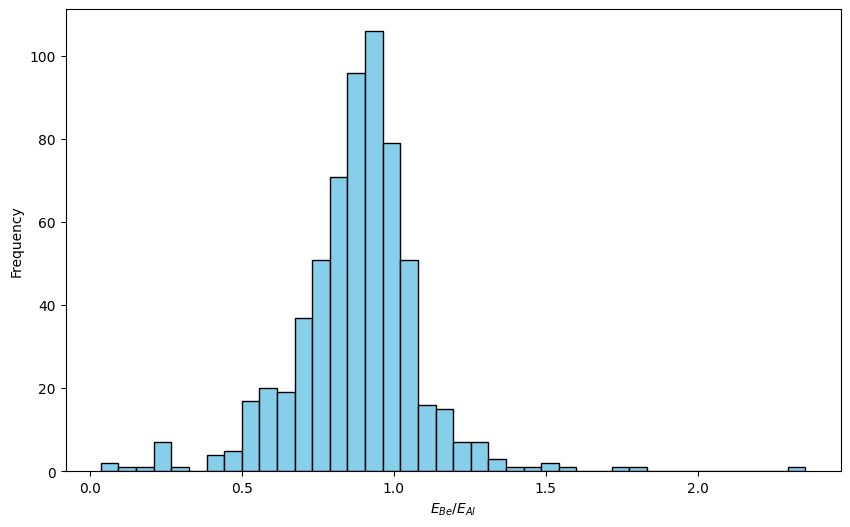

In [9]:
import matplotlib.pyplot as plt

# Specify the column for the histogram
selected_column = "Erosion_Rate_Ratio"

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df[selected_column], bins=40, color='skyblue', edgecolor='black')
plt.xlabel(r'$E_{Be}/E_{Al}$')
plt.ylabel('Frequency')

Normality tests: first, Shapiro-Wilk test (if p-value is less than 0.05, the data is not normally distributed):

In [10]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df['Erosion_Rate_Ratio'])

# Display the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.9234407077149137
P-value: 2.834231875021526e-17
The data is not normally distributed.


The histogram above suggests that the non-normality may be due to long tails, rather than the mostly normal-looking bulk of the data. Check this with a Q-Q plot for visual inspection:

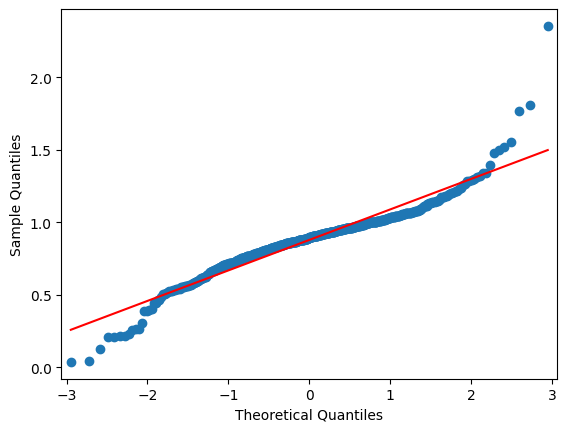

In [11]:
import statsmodels.api as sm

sm.qqplot(df['Erosion_Rate_Ratio'], line='s')
plt.show()

As expected, most values fall along the normality line, with only the extreme values displaying non-normality. We will proceed with calculating the population statistics treating this distribution as approximately normal.

In [12]:
#Display erosion rate ratio statistics
ERR_mean = df['Erosion_Rate_Ratio'].mean()
ERR_std = df['Erosion_Rate_Ratio'].std()
ERR_md = df['Erosion_Rate_Ratio'].median()

print(f'Erosion Rate Ratio Mean: {(ERR_mean):.3g}')
print(f'Erosion Rate Ratio Standard Deviation: {(ERR_std):.3g}')
print(f'Erosion Rate Ratio Median: {(ERR_md):.3g}')

Erosion Rate Ratio Mean: 0.879
Erosion Rate Ratio Standard Deviation: 0.21
Erosion Rate Ratio Median: 0.894


Calculating the number of samples with erosion rate ratios that do and do not overlap with 1 considering 1-sigma and 2-sigma uncertainties

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ERRs = df['Erosion_Rate_Ratio']
del_ERR = df['E_Ratio_Unc']

overlap_sorted = (ERRs - del_ERR <= 1) & (ERRs + del_ERR >= 1)
overlap_sorted2sig = (ERRs - 2*del_ERR <= 1) & (ERRs + 2*del_ERR >= 1)

num_overlap = overlap_sorted.sum()
num_non_overlap = len(overlap_sorted) - num_overlap
num_overlap2sig = overlap_sorted2sig.sum()
num_non_overlap2sig = len(overlap_sorted2sig) - num_overlap2sig

print(f'Number of points that overlap with 1 (1-sigma): {num_overlap}')
print(f'Number of points that do not overlap with 1 (1-sigma): {num_non_overlap}')
print(f'Number of points that overlap with 1 (2-sigma): {num_overlap2sig}')
print(f'Number of points that do not overlap with 1 (2-sigma): {num_non_overlap2sig}')

Number of points that overlap with 1 (1-sigma): 348
Number of points that do not overlap with 1 (1-sigma): 276
Number of points that overlap with 1 (2-sigma): 537
Number of points that do not overlap with 1 (2-sigma): 87


Code to make kernel density plots in figure 4. We used the 'pairplot' function in the seaborn package to create the kernel density plots color-coded by erosion rate ratio categories. We then exported the figure as an SVG file, removed the scatterplots, re-arranged the kernel density plots to be in a grid, and re-colored the kernel density plots to match the color scheme of other figures.

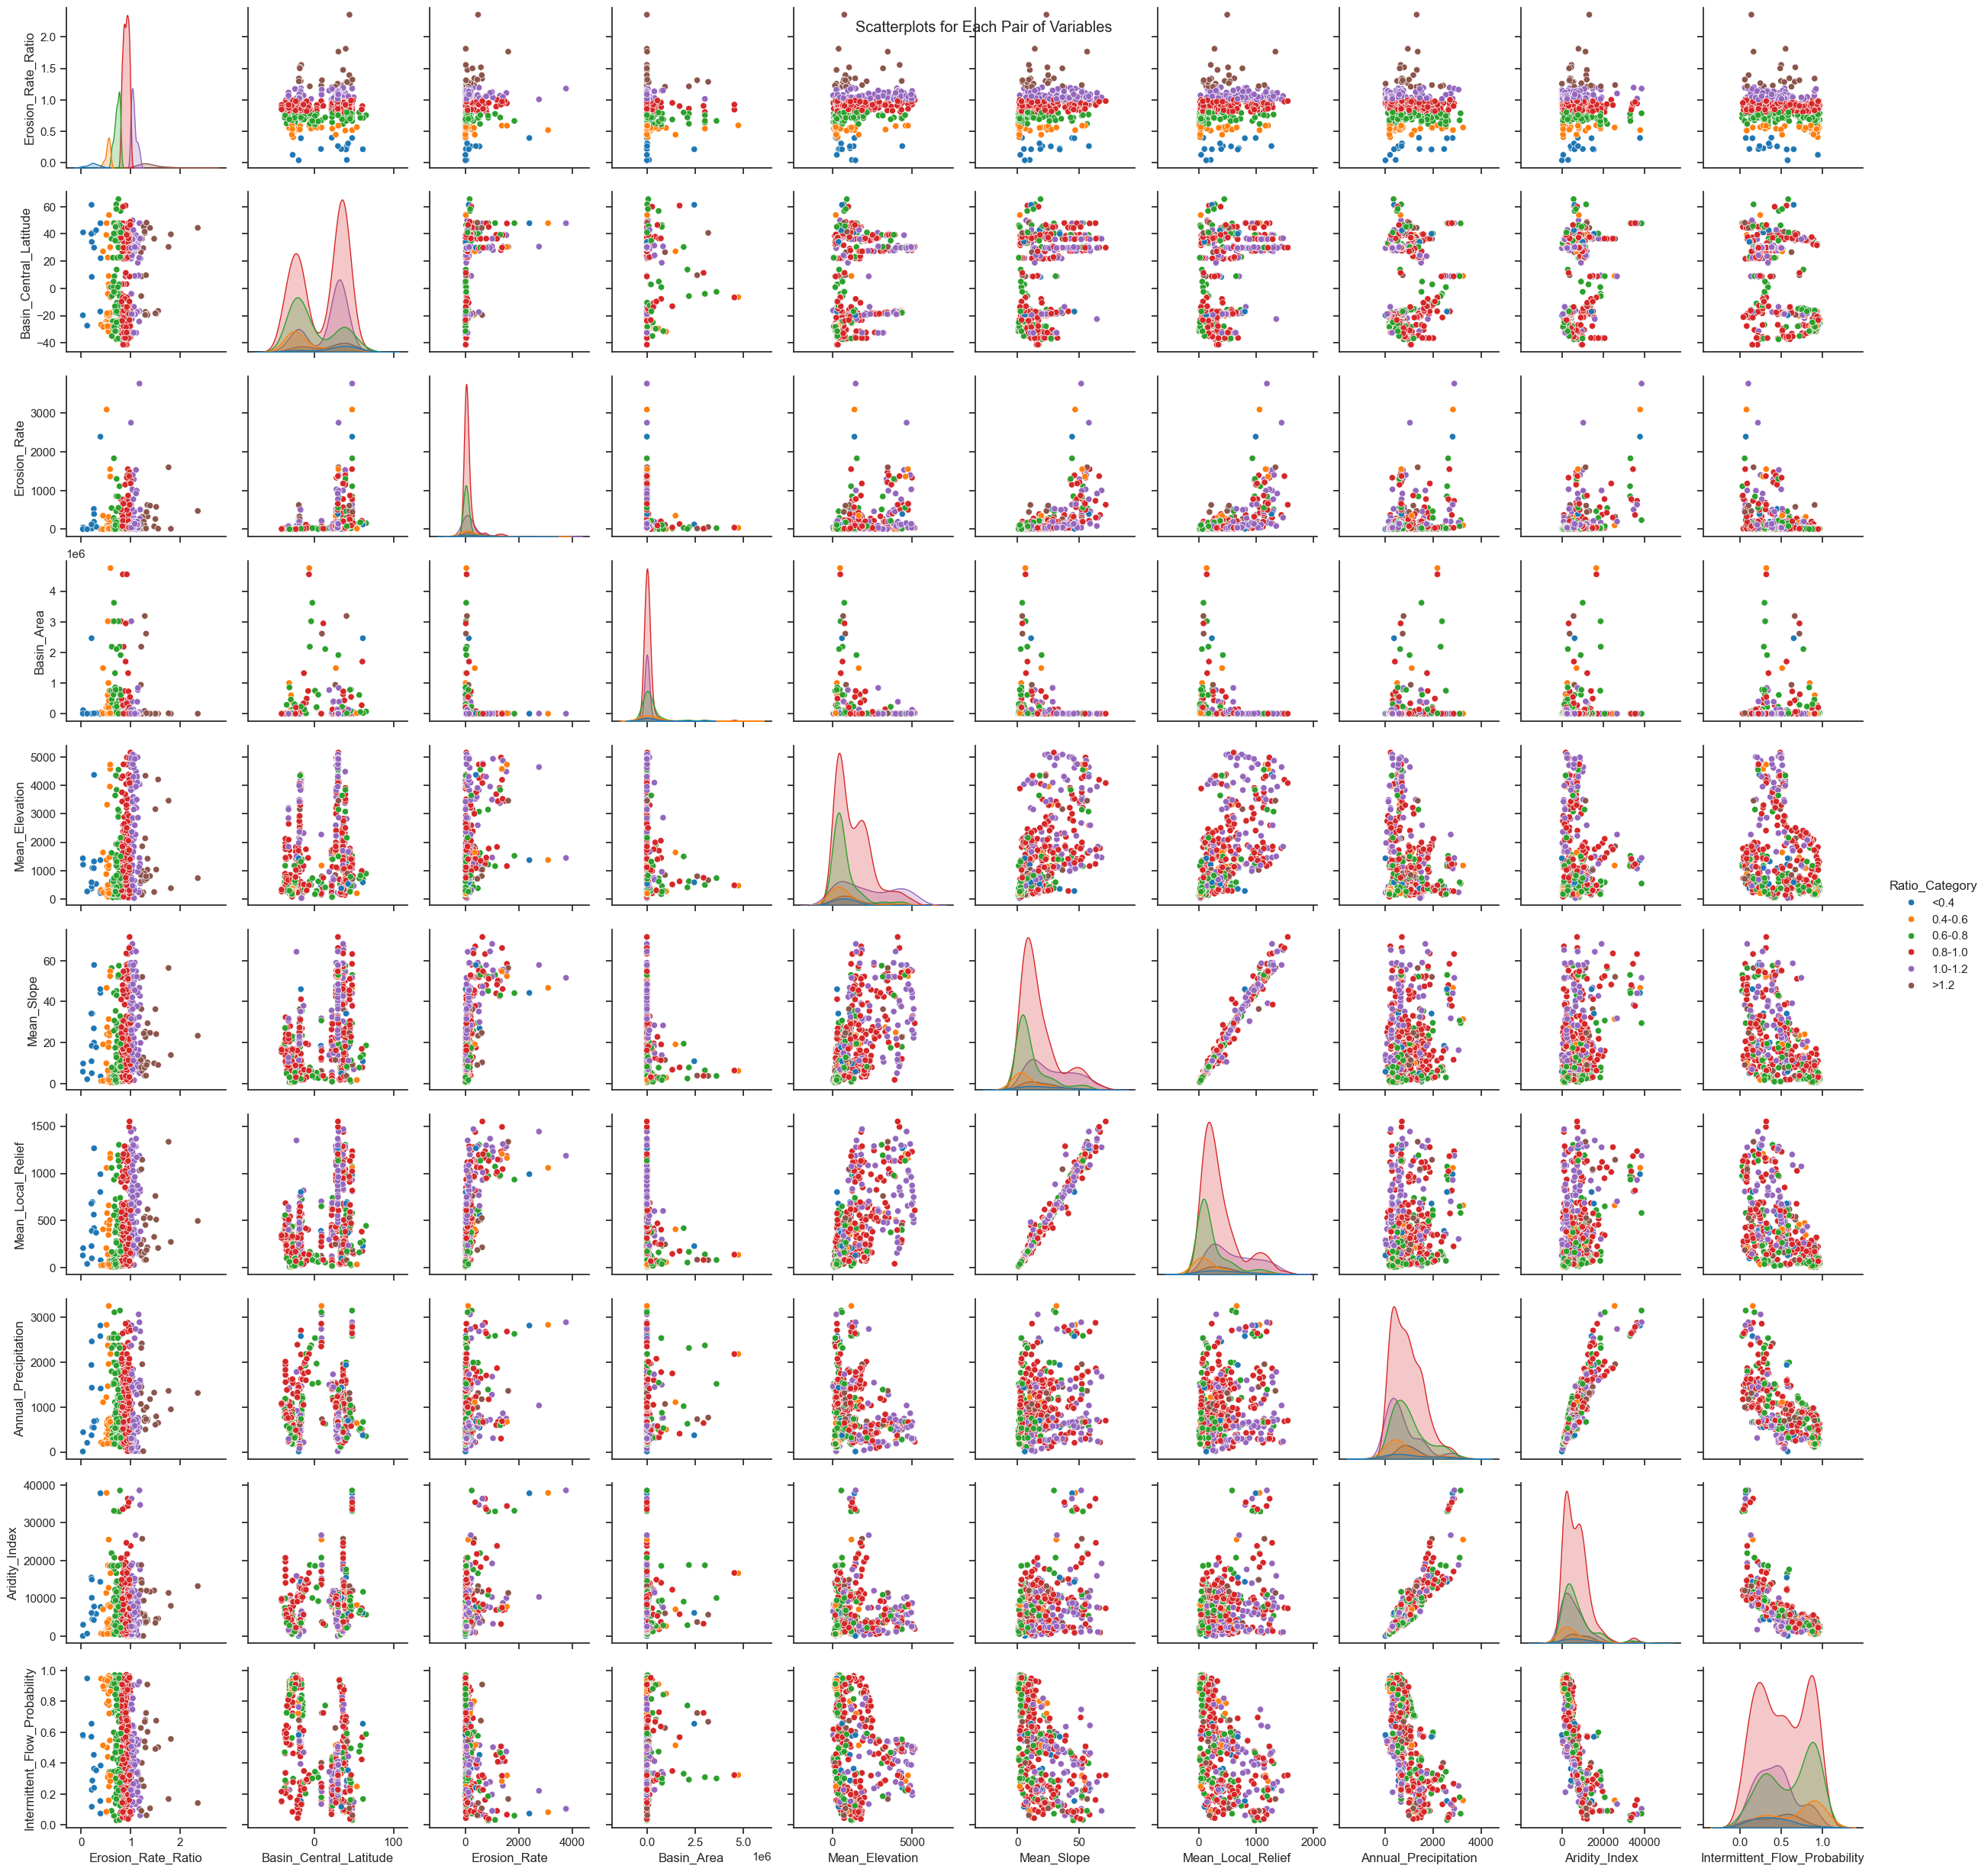

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create categories for 'Ratio' values
conditions = [
    (df['Erosion_Rate_Ratio'] < 0.4),
    (df['Erosion_Rate_Ratio'] >= 0.4) & (df['Erosion_Rate_Ratio'] < 0.6),
    (df['Erosion_Rate_Ratio'] >= 0.6) & (df['Erosion_Rate_Ratio'] < 0.8),
    (df['Erosion_Rate_Ratio'] >= 0.8) & (df['Erosion_Rate_Ratio'] < 1.0),
    (df['Erosion_Rate_Ratio'] >= 1.0) & (df['Erosion_Rate_Ratio'] < 1.2),
    (df['Erosion_Rate_Ratio'] >= 1.2)
]

choices = ['<0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0-1.2', '>1.2']
df['Ratio_Category'] = pd.Series(pd.cut(df['Erosion_Rate_Ratio'], bins=[-float("inf"), 0.4, 0.6, 0.8, 1.0, 1.2, float("inf")], labels=choices))

# Select only the specified variables for correlation calculation
selected_variables = ['Erosion_Rate_Ratio', 'Basin_Central_Latitude', 'Erosion_Rate', 'Basin_Area', 
                      'Mean_Elevation', 'Mean_Slope', 'Mean_Local_Relief', 
                      'Annual_Precipitation', 'Aridity_Index', 'Intermittent_Flow_Probability']
%matplotlib inline

# Plot scatterplots for each pair of variables with color-coded 'Ratio' values
sns.set(style="ticks")
sns.pairplot(df, hue='Ratio_Category', palette='tab10', vars=selected_variables)
plt.suptitle('Scatterplots for Each Pair of Variables')
plt.show()

Code for Figure 5: Cross correlation heatmap and correlation p-values. The first block of code calculates Spearman's rank correlations between variables and plots the relationships in a heatmap. The second block calculates the p-values for correlations. To construct figure 5 we exported the correlation heatmap as an SVG file and modified the font styling of the correlation values to indicate p-values according to the key in figure 5.

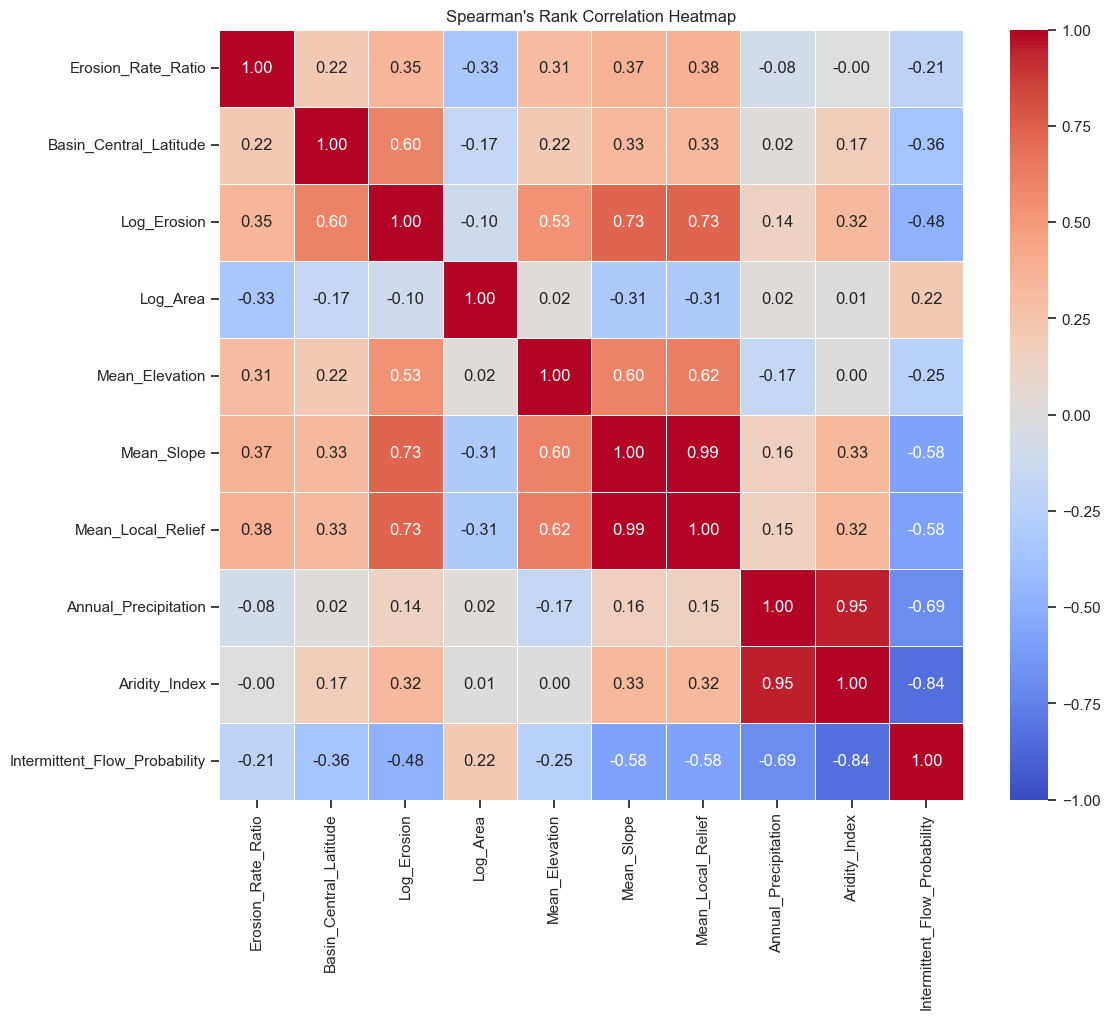

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the specified variables for correlation calculation
selected_variables = ['Erosion_Rate_Ratio', 'Basin_Central_Latitude', 'Log_Erosion', 'Log_Area', 
                      'Mean_Elevation', 'Mean_Slope', 'Mean_Local_Relief', 
                      'Annual_Precipitation', 'Aridity_Index', 'Intermittent_Flow_Probability']
selected_df = df[selected_variables]

# Calculate Spearman's rank correlation matrix
spearmans_rank_correlation_matrix = selected_df.corr(method='spearman')

# Plotting the heatmap for Spearman's rank correlation coefficients
plt.figure(figsize=(12, 10))
sns.heatmap(spearmans_rank_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Spearman\'s Rank Correlation Heatmap')

plt.show()

In [18]:
import pandas as pd
from scipy.stats import spearmanr

# Select only the specified variables for correlation calculation
selected_variables = ['Erosion_Rate_Ratio', 'Basin_Central_Latitude', 'Log_Erosion', 'Log_Area', 
                      'Mean_Elevation', 'Mean_Slope', 'Mean_Local_Relief', 
                      'Annual_Precipitation', 'Aridity_Index', 'Intermittent_Flow_Probability']
selected_df = df[selected_variables]

# Calculate p-values for each correlation coefficient
p_values = selected_df.corr(method=lambda x, y: spearmanr(x, y)[1])

# Display the p-values table
print("P-Values for Spearman's Rank Correlation Coefficients:")
print(p_values)


P-Values for Spearman's Rank Correlation Coefficients:
                               Erosion_Rate_Ratio  Basin_Central_Latitude  \
Erosion_Rate_Ratio                   1.000000e+00            3.971923e-08   
Basin_Central_Latitude               3.971923e-08            1.000000e+00   
Log_Erosion                          3.720677e-19            6.856712e-63   
Log_Area                             8.428432e-18            3.396567e-05   
Mean_Elevation                       2.525396e-15            4.040304e-08   
Mean_Slope                           1.149678e-21            7.556889e-17   
Mean_Local_Relief                    5.382915e-23            6.464861e-17   
Annual_Precipitation                 4.602383e-02            5.760398e-01   
Aridity_Index                        9.861259e-01            1.361109e-05   
Intermittent_Flow_Probability        5.892307e-07            9.236076e-18   

                                 Log_Erosion      Log_Area  Mean_Elevation  \
Erosion_Rate_Ratio 

Code for ANOVA testing of categorical variables and basin areas. Basin areas were binned on a logarithmic scale in Table S1. For each ANOVA test below, we first display the variable categories and sample numbers, then run tests to check for homogeneity of variances, and then use an appropriate test (parametric or non-parametric depending on homogeneity) and display the ANOVA results. We run post-hoc tests using both means and medians.

Basin area ANOVA. First defining categories based on basin areas and then a visualization of these categories

In [27]:
import pandas as pd

# Define the bins and corresponding labels
bins = [-float('inf'), 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['< 1', '1-10', '10-100', '100-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000']
# Create a new column 'category' with the categorized values
df['Area_Category'] = pd.cut(df['Basin_Area'], bins=bins, labels=labels, right=False)


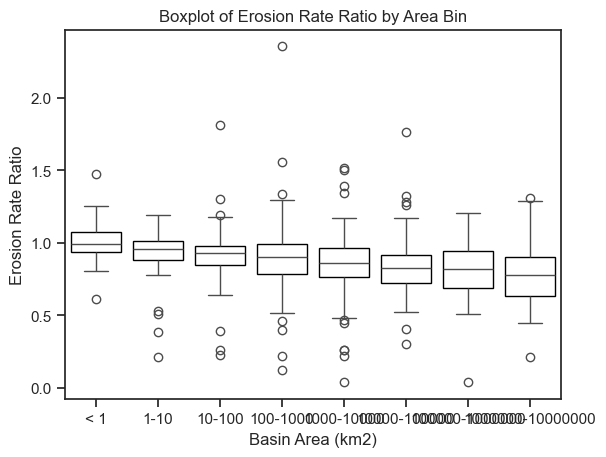

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots
sns.boxplot(x='Area_Category', y='Erosion_Rate_Ratio', data=df, boxprops=dict(facecolor='none', edgecolor='black'))
plt.title('Boxplot of Erosion Rate Ratio by Area Bin')
plt.xlabel('Basin Area (km2)')
plt.ylabel('Erosion Rate Ratio')
plt.show()

Testing for homogeneity of variances across basin area categories

In [30]:
from scipy.stats import levene

# Levene's test for homogeneity of variances - Basin Area
groups = [group[1]['Erosion_Rate_Ratio'] for group in df.groupby('Area_Category', observed=False)]
stat, p_value = levene(*groups)

# Display the results
print(f"Levene Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The variances are not homogeneous across groups.")
else:
    print("The variances appear to be homogeneous across groups.")

Levene Test Statistic: 1.6264580102744886
P-value: 0.1249805871798161
The variances appear to be homogeneous across groups.


Having passed the homogeneity of variances check, we move forward with a standard one-way ANOVA 

In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the model
model = ols('Erosion_Rate_Ratio ~ C(Area_Category)', data=df).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

                     sum_sq     df         F        PR(>F)
C(Area_Category)   1.916712    7.0  6.566906  1.700227e-07
Residual          25.684958  616.0       NaN           NaN


ANOVA indicates statistically-significant differences between the categories. Below we conduct multi-comparison of means and medians analyses to investigate the differences in more detail.

In [33]:
import pandas as pd

#Calculating the means, medians, and standard deviation of each group.
grouped_stats = df.groupby('Area_Category', observed=False)['Erosion_Rate_Ratio'].agg(['mean', 'median','std', 'count'])
print(grouped_stats)

                      mean    median       std  count
Area_Category                                        
< 1               1.017550  0.995134  0.142236     41
1-10              0.927720  0.954194  0.171240     56
10-100            0.916483  0.926966  0.184681    101
100-1000          0.893072  0.905419  0.227556    134
1000-10000        0.847566  0.858480  0.217485    122
10000-100000      0.835526  0.826697  0.201670     82
100000-1000000    0.805500  0.820593  0.197202     63
1000000-10000000  0.786794  0.778626  0.253029     25


In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Multi-comparison of means analysis with Tukey's HSD
posthoc = pairwise_tukeyhsd(df['Erosion_Rate_Ratio'], df['Area_Category'], alpha=0.05)
print(posthoc)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
            1-10           10-100  -0.0112    1.0 -0.1147  0.0922  False
            1-10         100-1000  -0.0346 0.9634 -0.1335  0.0642  False
            1-10       1000-10000  -0.0802 0.2278 -0.1804  0.0201  False
            1-10     10000-100000  -0.0922 0.1562 -0.1999  0.0155  False
            1-10   100000-1000000  -0.1222 0.0259 -0.2363 -0.0082   True
            1-10 1000000-10000000  -0.1409 0.0807 -0.2903  0.0085  False
            1-10              < 1   0.0898 0.3901 -0.0378  0.2175  False
          10-100         100-1000  -0.0234 0.9886 -0.1052  0.0584  False
          10-100       1000-10000  -0.0689 0.1935 -0.1525  0.0146  False
          10-100     10000-100000   -0.081 0.1348 -0.1733  0.0114  False
          10-100   100000-1000000   -0.111 0.0172 -

In [37]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Multi-comparison of medians analysis using Kruskal-Wallis H analysis
area_groups = [group[1]['Erosion_Rate_Ratio'] for group in df.groupby('Area_Category', observed=False)]

# Perform Kruskal-Wallis H test
h_statistic, p_value = stats.kruskal(*area_groups)

# Display the results
print(f"Kruskal-Wallis H Statistic: {h_statistic}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The medians of groups are significantly different.")
    # Perform post-hoc pairwise comparisons
    posthoc_results = sp.posthoc_dunn(df, val_col='Erosion_Rate_Ratio', group_col='Area_Category', p_adjust='bonferroni')
    print(posthoc_results)
else:
    print("The medians of groups are not significantly different.")

Kruskal-Wallis H Statistic: 74.8955132424494
P-value: 1.505921932826356e-13
The medians of groups are significantly different.
                           < 1      1-10    10-100  100-1000    1000-10000  \
< 1               1.000000e+00  1.000000  0.027729  0.000270  7.546352e-07   
1-10              1.000000e+00  1.000000  1.000000  0.382481  4.824308e-03   
10-100            2.772865e-02  1.000000  1.000000  1.000000  9.558265e-02   
100-1000          2.698405e-04  0.382481  1.000000  1.000000  1.000000e+00   
1000-10000        7.546352e-07  0.004824  0.095583  1.000000  1.000000e+00   
10000-100000      1.120034e-08  0.000114  0.002236  0.104837  1.000000e+00   
100000-1000000    3.569843e-08  0.000220  0.004240  0.141386  1.000000e+00   
1000000-10000000  2.579683e-06  0.001905  0.023651  0.263716  1.000000e+00   

                  10000-100000  100000-1000000  1000000-10000000  
< 1               1.120034e-08    3.569843e-08          0.000003  
1-10              1.137277e-04    2.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scikit_posthocs/_posthocs.py:357: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_lens = x.groupby(_group_col)[_val_col].count()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scikit_posthocs/_posthocs.py:360: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_ranks_avg = x.groupby(_group_col)['ranks'].mean()


Finally, calculating how many samples in each basin area category had erosion rate ratios below 1 (considering 1-sigma uncertainties). These results are shown in Table 2 in the main manuscript.

In [38]:
import pandas as pd

# Calculate the lower bound of the E_ratio considering uncertainty
df['E_ratio_upper_bound'] = df['Erosion_Rate_Ratio'] + df['E_Ratio_Unc']

# Filter the DataFrame to include only rows where the lower bound is below 1
filtered_df = df[df['E_ratio_upper_bound'] < 1]

# Count the number of samples within each area category that meet the criteria
counts = filtered_df['Area_Category'].value_counts()

# Display the results
counts

# Calculate the total number of samples within each area category
total_counts = df['Area_Category'].value_counts()

# Calculate the percentage of samples with E_ratio below 1
percentage_counts = (counts / total_counts) * 100

# Combine counts and percentage_counts into a single DataFrame
results = pd.DataFrame({
    'Count': counts,
    'Percentage': percentage_counts
}).sort_index()

# Display the results sorted by the area categories from smallest to largest
results_sorted = results.sort_index()

# Display the results sorted by the area categories from smallest to largest
results_sorted = results.sort_index()

# Display the results using IPython display
from IPython.display import display
display(results_sorted)

,Count,Percentage
Area_Category,,
< 1,3,7.317073
1-10,9,16.071429
10-100,30,29.702970
100-1000,52,38.805970
1000-10000,62,50.819672
10000-100000,46,56.097561
100000-1000000,30,47.619048
1000000-10000000,13,52.000000


ANOVA test for lithology

In [40]:
#Displaying the number of basins in each dominant lithology category
print(f"Unique values in {'Lithology'}:")
print(df['Lithology'].value_counts())

Unique values in Lithology:
Lithology
Siliciclastic Sedimentary Rocks    186
Unconsolidated Sediments           103
Mixed Sedimentary Rocks             96
Acid Plutonic Rocks                 82
Metamorphic Rocks                   76
Acid Volcanic Rocks                 28
Carbonate Sedimentary Rocks         26
Basic Volcanic Rocks                13
Intermediate Volcanic Rocks          9
Pyroclastic                          4
Basic Plutonic Rocks                 1
Name: count, dtype: int64


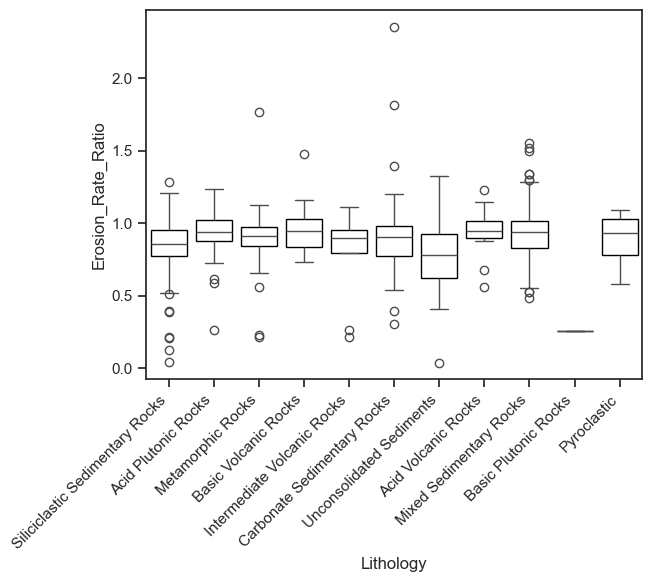

In [41]:
import seaborn as sns

sns.boxplot(x='Lithology', y='Erosion_Rate_Ratio', data=df, boxprops=dict(facecolor='none', edgecolor='black'))
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
from scipy.stats import levene

# Levene's test for homogeneity of variances - Lithology
groups = [group[1]['Erosion_Rate_Ratio'] for group in df.groupby('Lithology')]
stat, p_value = levene(*groups)

# Display the results
print(f"Levene Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The variances are not homogeneous across groups.")
else:
    print("The variances appear to be homogeneous across groups.")

Levene Test Statistic: 4.199361614707742
P-value: 1.1845494191338897e-05
The variances are not homogeneous across groups.


Based on the boxplots of lithologies, it looks like the single Basic Plutonic basin may be throwing this off. We'll proceed without that basin

In [43]:
df_filtered = df[df['Lithology'] != 'Basic Plutonic Rocks']

groups = [group[1]['Erosion_Rate_Ratio'] for group in df_filtered.groupby('Lithology')]
stat, p_value = levene(*groups)

# Display the results
print(f"Levene Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The variances are not homogeneous across groups.")
else:
    print("The variances appear to be homogeneous across groups.")

Levene Test Statistic: 4.567711332065704
P-value: 7.550327441836221e-06
The variances are not homogeneous across groups.


There is still heterogeneity across groups, so we will jump straight into means and medians comparison

In [45]:
import pandas as pd

# Assuming 'df' is your DataFrame
#Removing Basic Plutonic Rocks because there is only 1 basin in that category and it has a very low ratio
df_filtered = df[df['Lithology'] != 'Basic Plutonic Rocks']
grouped_stats = df_filtered.groupby('Lithology')['Erosion_Rate_Ratio'].agg(['mean', 'std','median', 'count'])
print(grouped_stats)

                                     mean       std    median  count
Lithology                                                           
Acid Plutonic Rocks              0.943621  0.140013  0.934851     82
Acid Volcanic Rocks              0.953248  0.132086  0.946678     28
Basic Volcanic Rocks             0.954060  0.201331  0.944882     13
Carbonate Sedimentary Rocks      0.948424  0.408872  0.906085     26
Intermediate Volcanic Rocks      0.775882  0.322299  0.895833      9
Metamorphic Rocks                0.894117  0.183617  0.910764     76
Mixed Sedimentary Rocks          0.934903  0.208018  0.938692     96
Pyroclastic                      0.882005  0.224022  0.928656      4
Siliciclastic Sedimentary Rocks  0.848730  0.172459  0.856571    186
Unconsolidated Sediments         0.784221  0.225008  0.778626    103


In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post-hoc analysis with Tukey's HSD
posthoc = pairwise_tukeyhsd(df_filtered['Erosion_Rate_Ratio'], df_filtered['Lithology'], alpha=0.05)
print(posthoc)

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
             group1                          group2             meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------
            Acid Plutonic Rocks             Acid Volcanic Rocks   0.0096    1.0 -0.1308    0.15  False
            Acid Plutonic Rocks            Basic Volcanic Rocks   0.0104    1.0  -0.181  0.2019  False
            Acid Plutonic Rocks     Carbonate Sedimentary Rocks   0.0048    1.0 -0.1396  0.1492  False
            Acid Plutonic Rocks     Intermediate Volcanic Rocks  -0.1677 0.3491  -0.393  0.0575  False
            Acid Plutonic Rocks               Metamorphic Rocks  -0.0495 0.8759 -0.1516  0.0526  False
            Acid Plutonic Rocks         Mixed Sedimentary Rocks  -0.0087    1.0 -0.1052  0.0877  False
            Acid Plutonic Rocks                     Pyroclastic  -0.0616 

In [47]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Multi-comparison of medians analysis using Kruskal-Wallis H analysis
area_groups = [group[1]['Erosion_Rate_Ratio'] for group in df.groupby('Lithology', observed=False)]

# Perform Kruskal-Wallis H test
h_statistic, p_value = stats.kruskal(*area_groups)

# Display the results
print(f"Kruskal-Wallis H Statistic: {h_statistic}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The medians of groups are significantly different.")
    # Perform post-hoc pairwise comparisons
    posthoc_results = sp.posthoc_dunn(df, val_col='Erosion_Rate_Ratio', group_col='Lithology', p_adjust='bonferroni')
    print(posthoc_results)
else:
    print("The medians of groups are not significantly different.")

Kruskal-Wallis H Statistic: 64.09501336677859
P-value: 6.036241826850867e-10
The medians of groups are significantly different.
                                 Acid Plutonic Rocks  Acid Volcanic Rocks  \
Acid Plutonic Rocks                     1.000000e+00             1.000000   
Acid Volcanic Rocks                     1.000000e+00             1.000000   
Basic Plutonic Rocks                    1.000000e+00             1.000000   
Basic Volcanic Rocks                    1.000000e+00             1.000000   
Carbonate Sedimentary Rocks             1.000000e+00             1.000000   
Intermediate Volcanic Rocks             1.000000e+00             1.000000   
Metamorphic Rocks                       1.000000e+00             1.000000   
Mixed Sedimentary Rocks                 1.000000e+00             1.000000   
Pyroclastic                             1.000000e+00             1.000000   
Siliciclastic Sedimentary Rocks         1.876269e-04             0.044640   
Unconsolidated Sediments 

Tectonic Activity ANOVA:

In [56]:
import pandas as pd

grouped_stats = df.groupby('STR_Class')['Erosion_Rate_Ratio'].agg(['mean','median', 'std', 'count'])
print(grouped_stats)

                   mean    median       std  count
STR_Class                                         
Active         0.934449  0.945122  0.220720    339
Post-Orogenic  0.812149  0.834646  0.176221    285


In [51]:
groups = [group[1]['Erosion_Rate_Ratio'] for group in df.groupby('STR_Class')]
stat, p_value = levene(*groups)

# Display the results
print(f"Levene Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The variances are not homogeneous across groups.")
else:
    print("The variances appear to be homogeneous across groups.")

Levene Test Statistic: 2.2496992401071902
P-value: 0.13414776221049374
The variances appear to be homogeneous across groups.


t-Test Statistic: 7.5476819598065905
P-value: 1.5829316227466382e-13
The means of groups are significantly different.


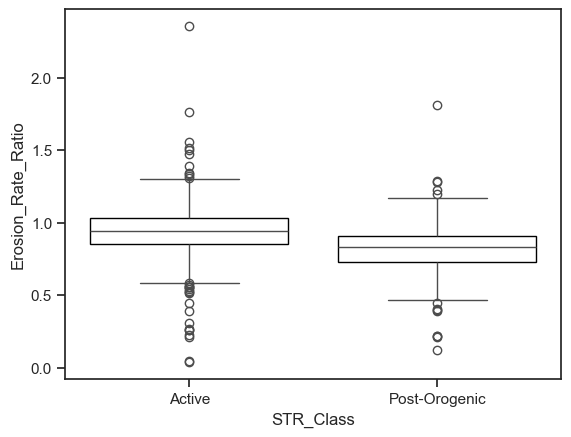

In [52]:
import scipy.stats as stats

tec_groups = [group[1]['Erosion_Rate_Ratio'] for group in df.groupby('STR_Class')]

t_statistic, p_value = stats.ttest_ind(*tec_groups)

# Display the results
print(f"t-Test Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The means of groups are significantly different.")
else:
    print("The means of groups are not significantly different.")
    
sns.boxplot(x='STR_Class', y='Erosion_Rate_Ratio', data=df, boxprops=dict(facecolor='none', edgecolor='black'))
plt.savefig('Tectonics_ANOVA.svg', format='svg', bbox_inches='tight')

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post-hoc analysis with Tukey's HSD
posthoc = pairwise_tukeyhsd(df['Erosion_Rate_Ratio'], df['STR_Class'], alpha=0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1     group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------
Active Post-Orogenic  -0.1223   0.0 -0.1541 -0.0905   True
----------------------------------------------------------


Mann-Whitney U Statistic: 69684.0
P-value: 1.5853956291847832e-21
The medians of groups are significantly different.


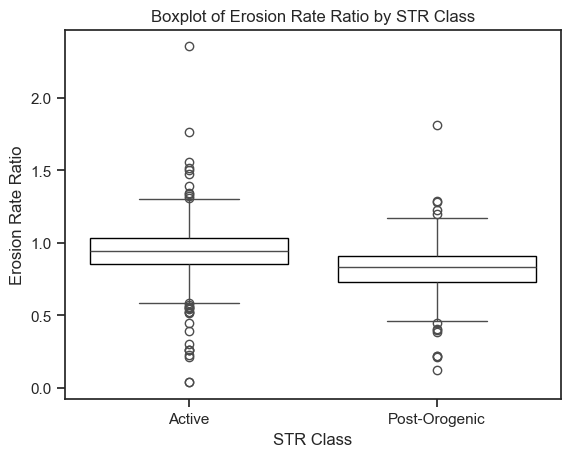

In [57]:
#The same but with medians instead of means
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your existing DataFrame
# Grouping the data by 'STR_Class' and getting the 'Erosion_Rate_Ratio' values
tec_groups = [group[1]['Erosion_Rate_Ratio'] for group in df.groupby('STR_Class')]

# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(*tec_groups, alternative='two-sided')

# Display the results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Check the p-value against a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The medians of groups are significantly different.")
else:
    print("The medians of groups are not significantly different.")

# Plot boxplots
sns.boxplot(x='STR_Class', y='Erosion_Rate_Ratio', data=df, boxprops=dict(facecolor='none', edgecolor='black'))
plt.title('Boxplot of Erosion Rate Ratio by STR Class')
plt.xlabel('STR Class')
plt.ylabel('Erosion Rate Ratio')
plt.show()